# Analysis of Data Related to European Football Leagues

# Introduction

Football, is a game in which two teams of 11 players, use any part of their bodies except their hands and arms to maneuver the ball into the opposing team’s goal. Only the goalkeeper is permitted to handle the ball and may do so only within the penalty area surrounding the goal. The goal is, typically, a large rectangular frame with a net attached to the back. The goal keeper is allowed to use his/her hands. The team that scores more goals wins. The standard length of a game is 90 minutes with a short break, known as ‘half time’, at the 45-minute mark. 

Basic skills
- Dribbling skills - This is a vital skill that involves skillfully controlling the ball. Dribbling comes into practice throughout the game when passing the ball from player to player and dodging opponents.
- Accuracy - This is crucial to learn when passing the ball in a skillful and tactical manner, to avoid the opposing team gaining control of the ball.
- Spatial Awareness – Awareness of your surroundings and knowing where the ball, the members or the opposing team and your team members are at all times.
- Communication Skills - Good listening and communication skills are another important skill as without them the game will not be successful. It’s important to listen to your teammates to tactfully play the game and get the best result.
- Teamwork - It’s important that everyone playing the game knows and understands their role and responsibilities. It’s also vital for each player to value everyone’s efforts and come together as a team to achieve a team win.

Football is believed to have originated in China in the third century BC. It is the world’s most popular ball game in numbers of players and spectators. Football’s governing body is the Fédération Internationale de Football Association (FIFA). Only America and Canada call the sport soccer. 



# Goals

Analyse the Europiean football dataset and see if you can provide anything that could give us a competitive advantage in the attempt to start strong in the new endevor.

# Technical Requirements

1. Perform data cleaning.
2. Perform exploratory data analysis.
3. Perform feature engineering.
4. Use parameters that give you the most important statistical insights of the data.
5. Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.
6. Perform statistical inference.
7. Do hypothesis testing. Set appropriate significance levels and create confidence intervals for the variables of interest.
8. Apply linear machine learning models and use them for forecasting. 
9. Use cross validation, information criteria, and/or other methods to specify your models correctly.
10. Choose and use appropriate metrics to measure your models' performance.
11. Provide clear explanations. 
12. Provide conclusions and suggestions about how the analysis can be improved.

# Standards

Below is a summary of the standards I followed to create this report. 

>* **Standard 1:** Since one of my goals was to determine what makes wine, "good," I concentrated on wines that received a high quality score of 7 or 8.
>* **Standard 2:** For correlation between features in the dataset, my threshold was 0.8 or higher to indicate a correlation.

# Biases

Below are the biases I identified while creating this report.

>* **Bias 1:** The number of wines in each quality category varies. For example, there are only 18 wines of quality 8 compared with 681 wines of quality 5. It is hard to trust our conclusions fully since we don't have a balance in the amount of data in each quality category. This creates a significant bias. 
>* **Bias 2:** I have no expertise in wine production or testing. There may be parts of the data that I have overlooked that may have been most important and I may have given importance to parts of the data that may have had little significance. 

# Libraries

In [352]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import xml.etree.ElementTree as ET
import eli5 as eli

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from xml.etree.ElementTree import fromstring, ElementTree
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from eli5.sklearn import PermutationImportance

# Display Parameters

## Display Features

In [353]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500
warnings.filterwarnings("ignore")

## Figure Parameters

In [309]:
size = 20
sns.set(style="white", palette = 'RdBu')

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Load Raw Data

In [5]:
football = sqlite3.connect(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\database.sqlite"
)

In [354]:
result = football.execute("SELECT name FROM sqlite_master WHERE type='table';")

for table in result:
    query = "SELECT * from " + str(table[0]) + ";"
    football_db[table[0]] = pd.read_sql_query(query, football)

# Dataset

For this report, I used the Ultimate 25k+ Matches Football Database - European dataset from Kaggle.

# Data Overview and Cleaning

This data set is comprised of seven (7) tables
1. Country
2. Leauge
3. Player
4. Plater Attribute
5. Team
6. Team Attribute
7. Match

## Country

The Country table is comprised of 11 countries whose leagues and teams are part of this dataset. 

In [355]:
country = football_db["Country"].copy()

In [356]:
country.rename(columns={"id": "CountryID", "name": "CountryName"}, inplace=True)

In [358]:
country

,CountryID,CountryName
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [388]:
country.shape

(11, 2)

### Section Summary
> * It is clear from the scatter plot and the performance metrics above that there is not a linear relationship between free sulfur dioxide and alcohol values.

## League

The League tables contains the 11 leagues, one from each country above.

In [362]:
league = football_db["League"].copy()

In [363]:
del league["id"]
league = league.rename(columns={"country_id":"LeagueID", "name": "LeagueName"})

In [366]:
league.head()

,LeagueID,LeagueName
0,1,Belgium Jupiler League
1,1729,England Premier League
2,4769,France Ligue 1
3,7809,Germany 1. Bundesliga
4,10257,Italy Serie A


In [387]:
league.shape

(11, 2)

## Player

The player table contains basic information about each of the players in the dataset. I calculated the Body Mass Index for each player, added it to this table for later analysis. 

In [379]:
player = football_db["Player"].copy()

In [380]:
player.drop(columns=["id", "player_fifa_api_id"], inplace=True)
player = player.set_index("player_api_id")
player = player.rename_axis("player_api_id").reset_index()

In [381]:
player.rename(
    columns={
        "player_api_id": "PlayerID",
        "player_name": "PlayerName",
        "birthday": "Birthday",
        "height": "Height",
        "weight": "Weight",
    },
    inplace=True,
)

In [382]:
player["BMI"] = np.round(
    (player["Weight"] / 2.205) / ((player["Height"] / 100.0) ** 2), 2
)

In [383]:
player["Birthday"] = pd.DatetimeIndex(player["Birthday"]).year

In [386]:
player[player.duplicated()].sum()

PlayerID      0.0
PlayerName    0.0
Birthday      0.0
Height        0.0
Weight        0.0
BMI           0.0
dtype: float64

In [384]:
player.head()

,PlayerID,PlayerName,Birthday,Height,Weight,BMI
0,505942,Aaron Appindangoye,1992,182.88,187,25.36
1,155782,Aaron Cresswell,1989,170.18,146,22.86
2,162549,Aaron Doran,1991,170.18,163,25.52
3,30572,Aaron Galindo,1982,182.88,198,26.85
4,23780,Aaron Hughes,1979,182.88,154,20.88


In [385]:
player.shape

(11060, 6)

## Player Attributes

The Player Attributes table contains vital attributes on each playermin the dataset. 

In [408]:
player_attributes = football_db["Player_Attributes"].copy()

In [409]:
player_attributes.shape

(183978, 42)

In [391]:
player_attributes.duplicated(subset=["date"]).sum()

183781

In [392]:
player_attributes.duplicated(subset=["player_api_id"]).sum()

172918

In [393]:
null_instances = player_attributes[
    player_attributes["attacking_work_rate"].isnull()
].index
player_attributes.drop(null_instances, inplace=True)

In [394]:
null_instances = player_attributes[player_attributes["volleys"].isnull()].index
player_attributes.drop(null_instances, inplace=True)

In [395]:
player_attributes["date"] = pd.DatetimeIndex(player_attributes["date"]).year
player_attributes.drop(columns=["id", "player_fifa_api_id"], inplace=True)

In [396]:
player_attributes.drop(
    columns=[
        "gk_diving",
        "gk_handling",
        "gk_kicking",
        "gk_positioning",
        "gk_reflexes",
    ],
    inplace=True,
)

In [397]:
def break_ties(col: str):
    most_common = pd.Series.mode(col)

    if len(most_common) > 1:
        return most_common[0]
    else:
        return most_common

In [398]:
players_categorical = (
    player_attributes.groupby(["player_api_id", "date"])[
        ["preferred_foot", "attacking_work_rate", "defensive_work_rate"]
    ]
    .agg(lambda x: break_ties(x))
    .reset_index()
)

In [399]:
players_numerical = (
    player_attributes.groupby(["player_api_id", "date"])
    .agg("mean", numeric_only=True)
    .reset_index()
)

In [400]:
player_attributes = pd.merge(
    players_categorical,
    players_numerical,
    on=["player_api_id", "date"],
    how="inner",
)

In [401]:
player_attributes.attacking_work_rate.unique()

array(['high', 'medium', 'None', 'low', 'norm', 'stoc', 'le', 'y'],
      dtype=object)

In [402]:
player_attributes.defensive_work_rate.unique()

array(['medium', 'low', '7', 'high', 'o', 'ormal', '4', 'tocky', '2', '9',
       '6', '3', 'ean', '1', '5', 'es', '0', '8'], dtype=object)

In [403]:
player_attributes["attacking_work_rate"].replace(
    ["norm", "stoc", "le", "y"], "None", inplace=True
)
player_attributes["defensive_work_rate"].replace(
    [
        "7",
        "o",
        "ormal",
        "4",
        "tocky",
        "2",
        "9",
        "6",
        "3",
        "ean",
        "1",
        "5",
        "es",
        "0",
        "8",
    ],
    "None",
    inplace=True,
)

In [404]:
player_attributes.rename(
    columns={
        "player_api_id": "PlayerID",
        "date": "Date",
        "overall_rating": "OverallRating",
        "potential": "Potential",
        "preferred_foot": "PreferredFoot",
        "attacking_work_rate": "AttackWorkRate",
        "defensive_work_rate": "DefenceWorkRate",
        "crossing": "Crossing",
        "finishing": "Finishing",
        "heading_accuracy": "HeadingAccuracy",
        "short_passing": "ShortPassing",
        "volleys": "Volleys",
        "dribbling": "Dribbling",
        "curve": "Curve",
        "free_kick_accuracy": "FreeKickAccuracy",
        "long_passing": "LongPassing",
        "ball_control": "BallControl",
        "acceleration": "Acceleration",
        "sprint_speed": "SprintSpeed",
        "agility": "Agility",
        "reactions": "Reactions",
        "balance": "Balance",
        "shot_power": "ShotPower",
        "jumping": "Jumping",
        "stamina": "Stamina",
        "strength": "Strength",
        "long_shots": "LongShots",
        "aggression": "Aggression",
        "interceptions": "Interceptions",
        "positioning": "Positioning",
        "vision": "Vision",
        "penalties": "Penalties",
        "marking": "Marking",
        "standing_tackle": "StandingTackle",
        "sliding_tackle": "SlidingTackle",
    },
    inplace=True,
)

In [405]:
player_attributes.head()

,PlayerID,Date,PreferredFoot,AttackWorkRate,DefenceWorkRate,OverallRating,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreeKickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,StandingTackle,SlidingTackle
0,2625,2007,right,high,medium,63.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,48.5,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0
1,2625,2008,right,high,medium,60.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0
2,2625,2010,right,high,medium,60.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,50.0,49.0,71.0,56.0,78.0,56.0,59.0,72.0,71.0,50.0,56.0,69.0,64.0,66.0,63.0
3,2625,2011,right,high,medium,58.5,60.5,52.0,47.0,46.0,58.0,37.0,56.0,49.0,50.0,66.0,58.0,66.0,63.0,58.0,49.0,61.5,68.0,55.0,77.0,55.0,58.0,71.0,65.0,49.0,55.0,66.0,63.0,63.0,57.0
4,2625,2012,right,medium,medium,58.0,58.0,52.0,47.0,46.0,53.0,37.0,56.0,49.0,50.0,66.0,58.0,67.0,63.0,67.0,49.0,76.0,68.0,55.0,77.0,55.5,58.0,71.0,64.0,49.0,55.0,66.0,63.0,63.0,52.0


In [406]:
player_attributes.shape

(70941, 35)

## Players

I merged the players table with the players attributes table to make one dataset with information about the players. I called this new datset players, saved it as a csv file and used it in the remainder of this analysis. 

In [ ]:
players = pd.merge(player, player_attributes, on="PlayerID", how="inner")

In [ ]:
players.to_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\players.csv",
    index=True,
)

## Team

There are 299 teams in this dataset.

In [49]:
team = football_db["Team"].copy()

In [50]:
team.drop(columns=["id", "team_fifa_api_id"], inplace=True)

In [51]:
team.rename(
    columns={
        "team_api_id": "TeamID",
        "team_long_name": "TeamLongName",
        "team_short_name": "TeamShortName",
    },
    inplace=True,
)

In [54]:
team[team.duplicated()].sum()

TeamID           0.0
TeamLongName     0.0
TeamShortName    0.0
dtype: float64

In [55]:
team.isnull().sum()

TeamID           0
TeamLongName     0
TeamShortName    0
dtype: int64

In [412]:
team.head()

,TeamID,TeamLongName,TeamShortName
0,9987,KRC Genk,GEN
1,9993,Beerschot AC,BAC
2,10000,SV Zulte-Waregem,ZUL
3,9994,Sporting Lokeren,LOK
4,9984,KSV Cercle Brugge,CEB


In [413]:
team.shape

(299, 3)

## Team Attributes

Attributes from each team.

In [414]:
team_attributes = football_db["Team_Attributes"].copy()

In [417]:
team_attributes[team_attributes.duplicated()].sum()

id                                0.0
team_fifa_api_id                  0.0
team_api_id                       0.0
date                              0.0
buildUpPlaySpeed                  0.0
buildUpPlaySpeedClass             0.0
buildUpPlayDribbling              0.0
buildUpPlayDribblingClass         0.0
buildUpPlayPassing                0.0
buildUpPlayPassingClass           0.0
buildUpPlayPositioningClass       0.0
chanceCreationPassing             0.0
chanceCreationPassingClass        0.0
chanceCreationCrossing            0.0
chanceCreationCrossingClass       0.0
chanceCreationShooting            0.0
chanceCreationShootingClass       0.0
chanceCreationPositioningClass    0.0
defencePressure                   0.0
defencePressureClass              0.0
defenceAggression                 0.0
defenceAggressionClass            0.0
defenceTeamWidth                  0.0
defenceTeamWidthClass             0.0
defenceDefenderLineClass          0.0
dtype: float64

In [62]:
team_attributes.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [63]:
team_attributes.drop(
    columns=[
        "id",
        "team_fifa_api_id",
        "buildUpPlayDribbling",
        "buildUpPlaySpeedClass",
        "buildUpPlayDribblingClass",
        "buildUpPlayPassingClass",
        "buildUpPlayPositioningClass",
        "chanceCreationPassingClass",
        "chanceCreationCrossingClass",
        "chanceCreationShootingClass",
        "chanceCreationPositioningClass",
        "defencePressureClass",
        "defenceAggressionClass",
        "defenceTeamWidthClass",
        "defenceDefenderLineClass",
    ],
    inplace=True,
)

In [64]:
team_attributes.rename(
    columns={
        "team_api_id": "TeamID",
        "date": "Date",
        "buildUpPlaySpeed": "BuildUpPlaySpeed",
        "buildUpPlayPassing": "BuildUpPlayPassing",
        "chanceCreationPassing": "ChanceCreationPassing",
        "chanceCreationCrossing": "ChanceCreationCrossing",
        "chanceCreationShooting": "ChanceCreationShooting",
        "defencePressure": "DefencePressure",
        "defenceAggression": "DefenceAggression",
        "defenceTeamWidth": "DefenceTeamWidth",
    },
    inplace=True,
)

In [65]:
team_attributes["Date"] = pd.DatetimeIndex(team_attributes["Date"]).year

In [66]:
team_attributes.head()

,TeamID,Date,BuildUpPlaySpeed,BuildUpPlayPassing,ChanceCreationPassing,ChanceCreationCrossing,ChanceCreationShooting,DefencePressure,DefenceAggression,DefenceTeamWidth
0,9930,2010,60,50,60,65,55,50,55,45
1,9930,2014,52,56,54,63,64,47,44,54
2,9930,2015,47,54,54,63,64,47,44,54
3,8485,2010,70,70,70,70,70,60,70,70
4,8485,2011,47,52,53,48,52,47,47,52


In [57]:
team_attributes.shape

(1458, 25)

I dropped all the catagorical columns

## Teams

In [67]:
teams = pd.merge(team, team_attributes, on="TeamID", how="inner")

In [68]:
teams.to_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\teams.csv",
    index=True,
)

## Match

I brought information from the players into this database. 

In [420]:
match = football_db["Match"].copy()

In [421]:
def extract_xml(row, col_name, xml_key, away_home):
    count = 0

    element = row[col_name]
    team_id = row[away_home + "_team_api_id"]

    if type(element) == int:
        return element

    elif element != None:
        tree = ElementTree(fromstring(element))
        root = tree.getroot()

        for child in root.iter(xml_key):
            if str(team_id) == child.text:
                count += 1
        return count
    else:
        return np.nan

In [422]:
def extract_possession_xml(row, col_name, xml_key):
    count = 0
    sum_pos = 0

    element = row[col_name]

    if type(element) == int:
        return element

    elif element != None:
        tree = ElementTree(fromstring(element))
        root = tree.getroot()
        for child in root.iter(xml_key):
            count += 1
            sum_pos += int(child.text)

        if count == 0:
            return np.nan
        else:
            return sum_pos / count
    else:
        return np.nan

In [423]:
match["HomeShoton"] = np.nan
match["AwayShoton"] = np.nan

In [ ]:
match["HomeShoton"] = match.apply(
    lambda x: extract_xml(x, "shoton", "team", "home"), axis=1
)
match["AwayShoton"] = match.apply(
    lambda x: extract_xml(x, "shoton", "team", "away"), axis=1
)

In [ ]:
match["HomeShotoff"] = np.nan
match["AwayShotoff"] = np.nan

In [ ]:
match["HomeShotoff"] = match.apply(
    lambda x: extract_xml(x, "shotoff", "team", "home"), axis=1
)
match["AwayShotoff"] = match.apply(
    lambda x: extract_xml(x, "shotoff", "team", "away"), axis=1
)

In [ ]:
match["HomeFoulCommit"] = np.nan
match["AwayFoulCommit"] = np.nan

In [ ]:
match["HomeFoulCommit"] = match.apply(
    lambda x: extract_xml(x, "foulcommit", "team", "home"), axis=1
)
match["AwayFoulCommit"] = match.apply(
    lambda x: extract_xml(x, "foulcommit", "team", "away"), axis=1
)

In [ ]:
match["HomeCard"] = np.nan
match["AwayCard"] = np.nan

In [ ]:
match["HomeCard"] = match.apply(
    lambda x: extract_xml(x, "card", "team", "home"), axis=1
)
match["AwayCard"] = match.apply(
    lambda x: extract_xml(x, "card", "team", "away"), axis=1
)

In [ ]:
match["HomeCross"] = np.nan
match["AwayCross"] = np.nan

In [ ]:
match["HomeCross"] = match.apply(
    lambda x: extract_xml(x, "cross", "team", "home"), axis=1
)
match["AwayCross"] = match.apply(
    lambda x: extract_xml(x, "cross", "team", "away"), axis=1
)

In [ ]:
match["HomeCorner"] = np.nan
match["AwayCorner"] = np.nan

In [ ]:
match["HomeCorner"] = match.apply(
    lambda x: extract_xml(x, "corner", "team", "home"), axis=1
)
match["AwayCorner"] = match.apply(
    lambda x: extract_xml(x, "corner", "team", "away"), axis=1
)

In [ ]:
match["HomePossession"] = np.nan
match["AwayPossession"] = np.nan

In [ ]:
match["HomePossession"] = match.apply(
    lambda x: extract_possession_xml(x, "possession", "homepos"), axis=1
)
match["AwayPossession"] = match.apply(
    lambda x: extract_possession_xml(x, "possession", "awaypos"), axis=1
)

In [ ]:
match.drop(
    columns=["id", "stage", "country_id", "season"],
    inplace=True,
)

In [ ]:
match.rename(
    columns={
        "league_id": "LeagueID",
        "match_api_id": "MatchID",
        "home_team_api_id": "HomeTeamID",
        "away_team_api_id": "AwayTeamID",
        "date": "Date",
        "home_team_goal": "HomeGoal",
        "away_team_goal": "AwayGoal",
        "home_player_1": "HomePlayer1",
        "home_player_2": "HomePlayer2",
        "home_player_3": "HomePlayer3",
        "home_player_4": "HomePlayer4",
        "home_player_5": "HomePlayer5",
        "home_player_6": "HomePlayer6",
        "home_player_7": "HomePlayer7",
        "home_player_8": "HomePlayer8",
        "home_player_9": "HomePlayer9",
        "home_player_10": "HomePlayer10",
        "home_player_11": "HomePlayer11",
        "away_player_1": "AwayPlayer1",
        "away_player_2": "AwayPlayer2",
        "away_player_3": "AwayPlayer3",
        "away_player_4": "AwayPlayer4",
        "away_player_5": "AwayPlayer5",
        "away_player_6": "AwayPlayer6",
        "away_player_7": "AwayPlayer7",
        "away_player_8": "AwayPlayer8",
        "away_player_9": "AwayPlayer9",
        "away_player_10": "AwayPlayer10",
        "away_player_11": "AwayPlayer11",
    },
    inplace=True,
)

In [ ]:
match.drop(match.iloc[:, 7:51], inplace=True, axis=1)

In [ ]:
match.drop(match.iloc[:, 29:67], inplace=True, axis=1)

In [ ]:
match["Date"] = pd.DatetimeIndex(match["Date"]).year

In [ ]:
match.head()

## Matches

Bringing info from each player into this table. 

In [ ]:
matches = pd.merge(league, match, on="LeagueID", how="inner")

In [ ]:
df_inner_Home = pd.merge(
    matches, teams, left_on=["HomeTeamID", "Date"], right_on=["TeamID", "Date"]
)

In [ ]:
df_inner_Home.rename(
    columns={
        "TeamID": "HomeTeamID",
        "TeamLongName": "HomeTeamLongName",
        "TeamShortName": "HomeTeamShortName",
        "BuildUpPlaySpeed": "HomeBuildUpPlaySpeed",
        "BuildUpPlayPassing": "HomeBuildUpPlayPassing",
        "ChanceCreationPassing": "HomeChanceCreationPassing",
        "ChanceCreationCrossing": "HomeChanceCreationCrossing",
        "ChanceCreationShooting": "HomeChanceCreationShooting",
        "DefencePressure": "HomeDefencePressure",
        "DefenceAggression": "HomeDefenceAggression",
        "DefenceTeamWidth": "HomeDefenceTeamWidth",
    },
    inplace=True,
)

In [ ]:
df_inner_Away = pd.merge(
    df_inner_Home, teams, left_on=["AwayTeamID", "Date"], right_on=["TeamID", "Date"]
)

In [ ]:
df_inner_Away.rename(
    columns={
        "TeamID": "AwayTeamID",
        "TeamLongName": "AwayTeamLongName",
        "TeamShortName": "AwayTeamShortName",
        "BuildUpPlaySpeed": "AwayBuildUpPlaySpeed",
        "BuildUpPlayPassing": "AwayBuildUpPlayPassing",
        "ChanceCreationPassing": "AwayChanceCreationPassing",
        "ChanceCreationCrossing": "AwayChanceCreationCrossing",
        "ChanceCreationShooting": "AwayChanceCreationShooting",
        "DefencePressure": "AwayDefencePressure",
        "DefenceAggression": "AwayDefenceAggression",
        "DefenceTeamWidth": "AwayDefenceTeamWidth",
    },
    inplace=True,
)

In [ ]:
matches = df_inner_Away

In [ ]:
matches.head()

In [ ]:
def overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
):

    df_merge = pd.merge(
        left_dataframe,
        right_dataframe,
        left_on=[date, player_id],
        right_on=[date, player],
        how="right",
    )
    df_merge[player] = df_merge[rating_column]
    del df_merge[rating_column]
    del df_merge[player_id]

    return df_merge

In [ ]:
overall_rating = players[["Date", "PlayerID", "OverallRating"]]

In [ ]:
player = "HomePlayer1"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = matches


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer2"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer3"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer4"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer5"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer6"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer7"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer8"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer9"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer10"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer11"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer1"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer2"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer3"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer4"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer5"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer6"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer7"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer8"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer9"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer10"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer11"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
matches = df_merge

In [ ]:
matches = matches.copy(deep=True)

matches["Result"] = matches["HomeGoal"] - matches["AwayGoal"]
matches.loc[matches["Result"] < 0, "Result"] = -1
matches.loc[matches["Result"] == 0, "Result"] = 0
matches.loc[matches["Result"] > 0, "Result"] = 1

result = matches.pop("Result")
matches.insert(8, "Result", result)

In [ ]:
def calculate_mean(df, column):
    df[column] = df[column].fillna(df[column].mean())

    return df

In [ ]:
attribute_list = [
    "HomeShoton",
    "AwayShoton",
    "HomeShotoff",
    "AwayShotoff",
    "HomeFoulCommit",
    "AwayFoulCommit",
    "HomeCard",
    "AwayCard",
    "HomeCross",
    "AwayCross",
    "HomeCorner",
    "AwayCorner",
    "HomePossession",
    "AwayPossession",
]

In [ ]:
player_list = [
    "HomePlayer1",
    "HomePlayer2",
    "HomePlayer3",
    "HomePlayer4",
    "HomePlayer5",
    "HomePlayer6",
    "HomePlayer7",
    "HomePlayer8",
    "HomePlayer9",
    "HomePlayer10",
    "HomePlayer11",
    "AwayPlayer1",
    "AwayPlayer2",
    "AwayPlayer3",
    "AwayPlayer4",
    "AwayPlayer5",
    "AwayPlayer6",
    "AwayPlayer7",
    "AwayPlayer8",
    "AwayPlayer9",
    "AwayPlayer10",
    "AwayPlayer11",
]

In [ ]:
column = player_list

matches = round(calculate_mean(matches, column), 1)

In [ ]:
column = attribute_list

matches = round(calculate_mean(matches, column), 0)

In [ ]:
home_long = matches.pop("HomeTeamLongName")
matches.insert(5, "HomeTeamLongName", home_long)

In [ ]:
home_short = matches.pop("HomeTeamShortName")
matches.insert(6, "HomeTeamShortName", home_short)

In [ ]:
away_long = matches.pop("AwayTeamLongName")
matches.insert(8, "AwayTeamLongName", away_long)

In [ ]:
away_short = matches.pop("AwayTeamShortName")
matches.insert(9, "AwayTeamShortName", away_short)

In [ ]:
matches = matches.loc[:, ~matches.columns.duplicated()].copy()

In [ ]:
matches.head()

In [ ]:
matches.to_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\matches.csv",
    index=True,
)

# Exploratory Data Analysis

In [133]:
players = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\players.csv",
    index_col=0,
)

In [424]:
teams = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\teams.csv",
    index_col=0,
)

In [71]:
matches = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\matches.csv",
    index_col=0,
)

## Total Number of Players

Approximately 10,000 players.

In [74]:
players.PlayerID.nunique()

10410

## Player's Foot and Overall Rating

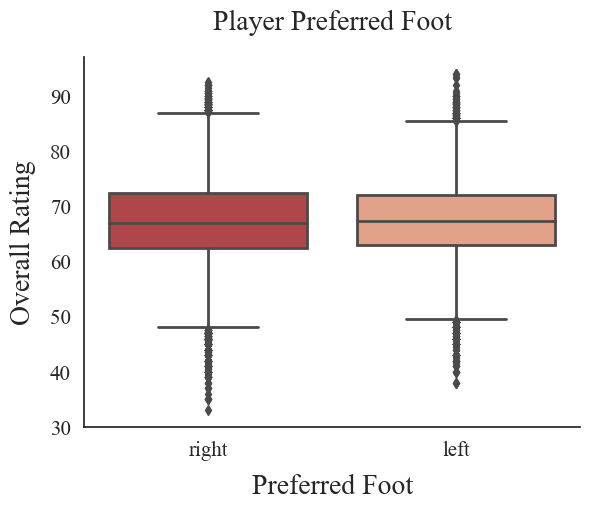

In [430]:
plt.rcParams.update(params)

sns.boxplot(x="PreferredFoot", y="OverallRating", data=players)

plt.xlabel("Preferred Foot")
plt.ylabel("Overall Rating")
plt.title('Player Preferred Foot', fontsize = size)
sns.despine();

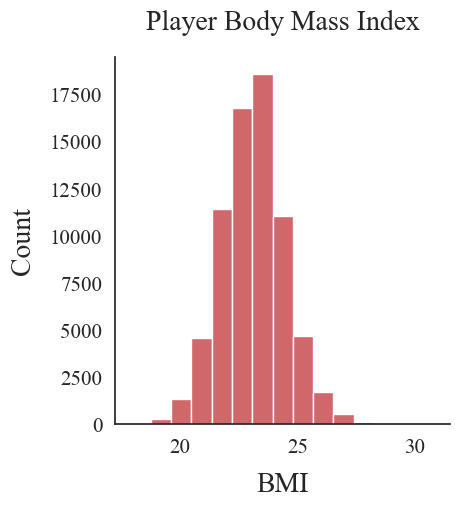

In [282]:
plt.rcParams.update(params)

sns.displot(data=players, x="BMI", bins=15)

plt.title('Player Body Mass Index', fontsize = size)
sns.despine();

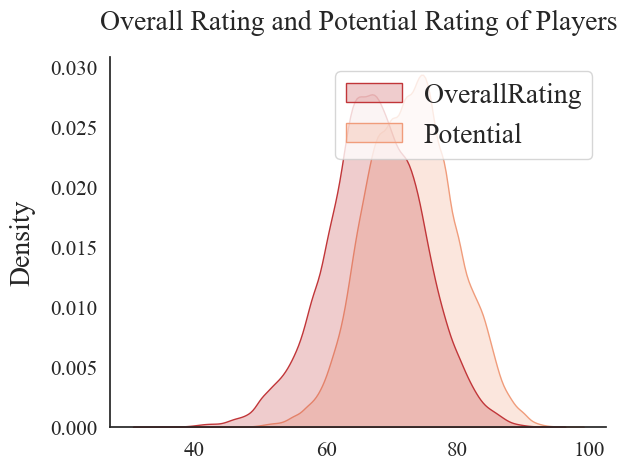

In [351]:
plt.rcParams.update(params)

sns.kdeplot(data=players[["OverallRating", "Potential"]], fill=True, legend=True)

plt.title('Overall Rating and Potential Rating of Players', fontsize = size)
sns.despine();

In [303]:
players["AttackWorkRate"].value_counts()
allowed_values = ["high", "medium", "low"]
players.loc[~players["AttackWorkRate"].isin(allowed_values), "AttackWorkRate"] = np.nan

attack_values = players.groupby("AttackWorkRate")["PlayerID"].nunique()
attack_values = (
    attack_values.to_frame().reset_index().rename(columns={"PlayerID": "Count"})
)
attack_values = attack_values.sort_values("Count", ascending=False)

In [304]:
players["DefenceWorkRate"].value_counts()
allowed_values = ["high", "medium", "low"]
players.loc[
    ~players["DefenceWorkRate"].isin(allowed_values), "DefenceWorkRate"
] = np.nan

defence_values = players.groupby("DefenceWorkRate")["PlayerID"].nunique()
defence_values = (
    defence_values.to_frame().reset_index().rename(columns={"PlayerID": "Count"})
)
defence_values = defence_values.sort_values("Count", ascending=False)

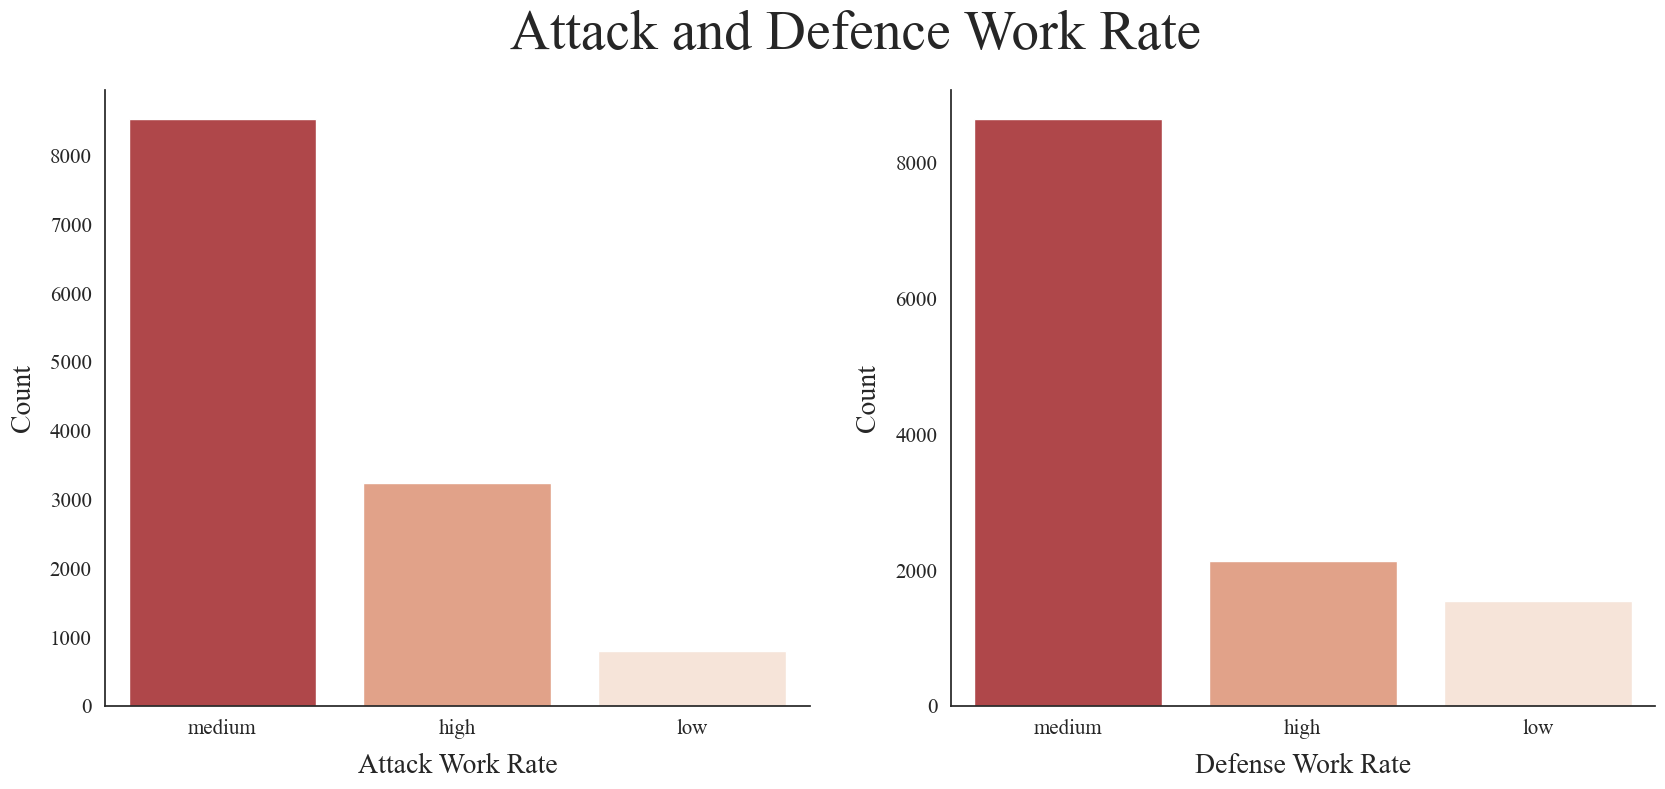

In [451]:
plt.rcParams.update(params)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

sns.barplot(data=attack_values, x="AttackWorkRate", y="Count", ax=ax1)
sns.barplot(data=defence_values, x="DefenceWorkRate", y="Count", ax = ax2)

ax1.set_xlabel('Attack Work Rate')
ax1.set_ylabel('Count')

ax2.set_xlabel('Defense Work Rate')
ax2.set_ylabel('Count')

plt.suptitle ("Attack and Defence Work Rate", fontsize = size*2)
sns.despine();

In [183]:
birthdays = players.groupby("Birthday")["PlayerID"].nunique()
birthdays = birthdays.to_frame().reset_index().rename(columns={"PlayerID": "Count"})

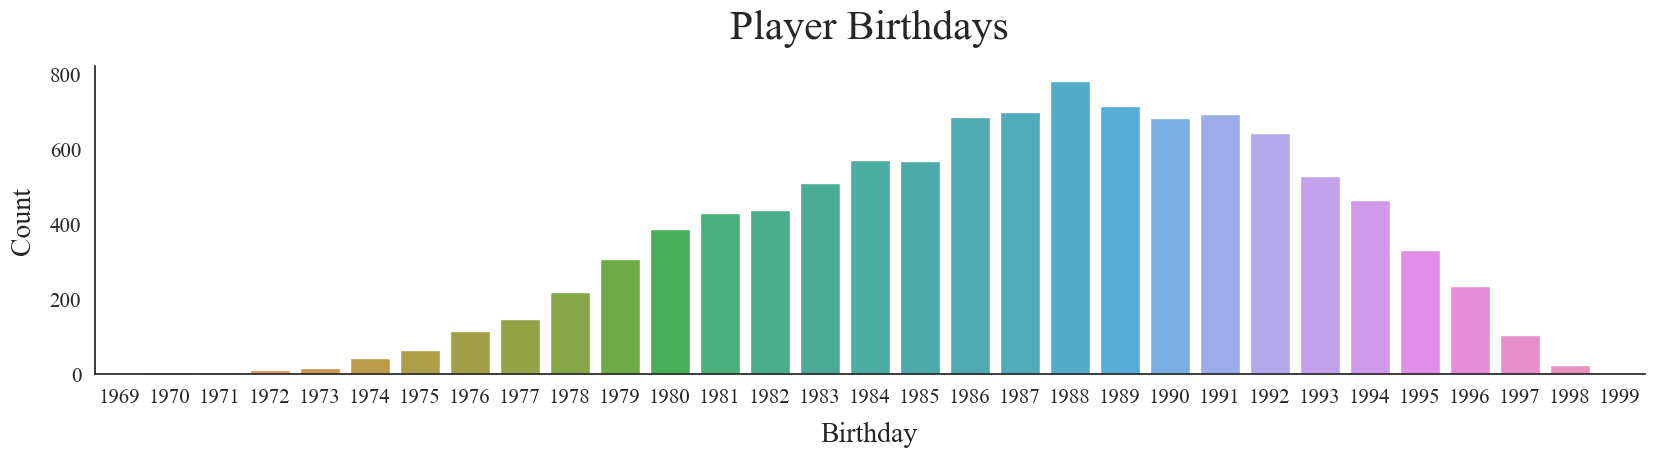

In [311]:
plt.rcParams.update(params)
plt.figure(figsize=(20, 4))

sns.barplot(data=birthdays, x="Birthday", y='Count')

plt.title('Player Birthdays', fontsize = size * 1.5)
sns.despine();

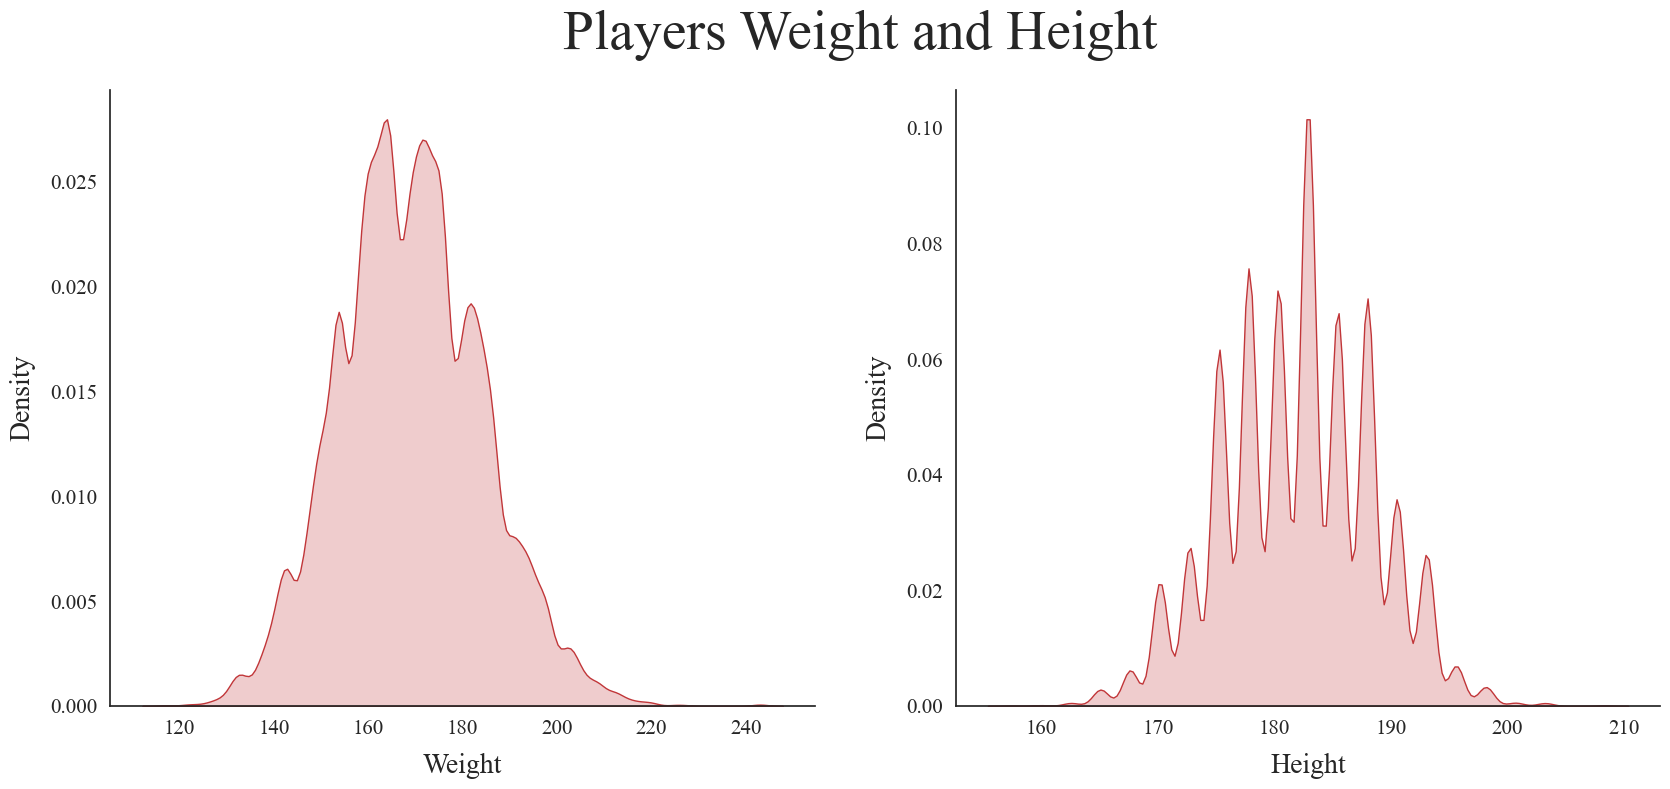

In [313]:
plt.rcParams.update(params)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

sns.kdeplot(data=players['Weight'], fill=True, legend=True, ax=ax1)
sns.kdeplot(data=players['Height'], fill=True, legend=True, ax=ax2)

plt.suptitle ("Players Weight and Height", fontsize = size*2)
sns.despine()

In [441]:
goals=matches[['HomeGoal','AwayGoal']]
goals = goals.sum(numeric_only = True)
goals = goals.to_frame().reset_index().rename(columns = {'index':'Goals', 0: 'Count'})

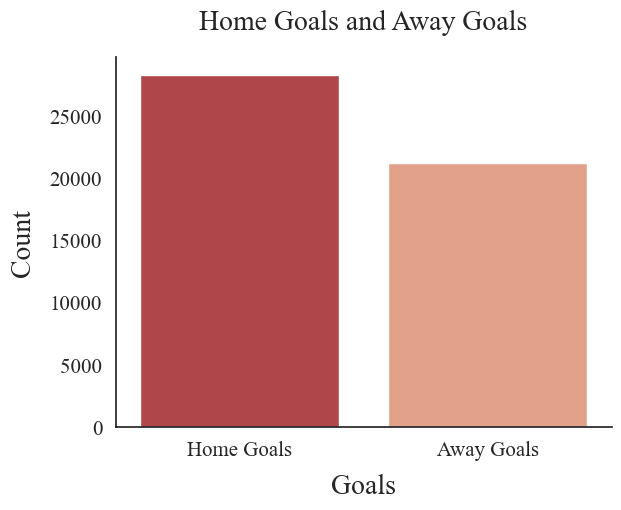

In [446]:
plt.rcParams.update(params)
fig, ax = plt.subplots()

sns.barplot(x="Goals", y = 'Count', data=goals)

ax.set_xticklabels(['Home Goals', 'Away Goals'])
plt.title('Home Goals and Away Goals', fontsize = size)
sns.despine();

In [328]:
goals_season = matches[["Date", "HomeGoal", "AwayGoal"]].groupby(by="Date").sum()
goals_season=goals_season.rename(columns = {"HomeGoal": "Home Goals", "AwayGoal": "Away Goals" })

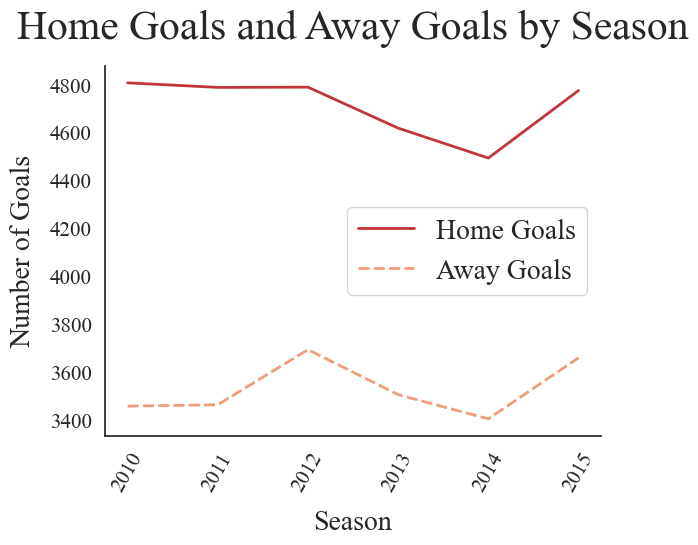

In [329]:
plt.rcParams.update(params)

sns.lineplot(data=goals_season)
plt.xticks(rotation=60)

labels = ["Away Goals", "Home Goals"]
plt.ylabel("Number of Goals")
plt.xlabel("Season")
plt.title('Home Goals and Away Goals by Season')
sns.despine()

In [333]:
goals = matches.sort_values("Result", ascending=False)

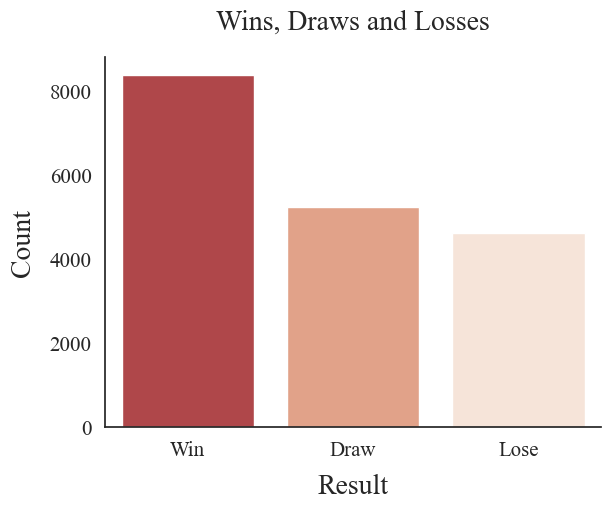

In [452]:
plt.rcParams.update(params)
fig, ax = plt.subplots()

sns.countplot(x=matches["Result"], order=matches['Result'].value_counts().index)

ax.set_ylabel('Count')
ax.set_xticklabels(['Win', 'Draw', 'Lose'])
plt.title('Wins, Draws and Losses', fontsize = size)
sns.despine();

# Machine Learning

I used various machine learning models to guess the winner.

In [ ]:
X = matches.loc[:, "HomePlayer1":"AwayDefenceTeamWidth"]
y = matches["Result"]

## Logistic Regression

The logistic regresssion model did not show good results.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=101
)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
log_model = LogisticRegression(solver="saga", multi_class="ovr", max_iter=5000)

In [ ]:
log_model.fit(scaled_X_train, y_train)

In [ ]:
y_predict = log_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test, y_predict)

In [ ]:
confusion_matrix(y_test, y_predict)

In [ ]:
print(classification_report(y_test, y_predict))

## PCA

Principle Component Analysis

In [ ]:
y = matches["Result"]

In [ ]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(X_scaled)

In [ ]:
print("Eigenvalues:")
print(pca.explained_variance_)
print()

In [ ]:
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

In [ ]:
fig = plt.figure(figsize=(10, 8))

sns.heatmap(X_pca.corr(), annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.20, shuffle=True, random_state=2
)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=2500)

clf.fit(X_train_pca, y_train)


y_pred = clf.predict(X_test_pca) 
y_true = y_test  


from sklearn.metrics import accuracy_score
import numpy as np

print("Train accuracy:", np.round(accuracy_score(y_train, clf.predict(X_train_pca)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))


from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap="Blues")
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)

In [ ]:
print(classification_report(y_true, y_pred))

## Random Forest

Random Forest cannot overfit.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, max_features="sqrt", random_state=101)

In [ ]:
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    plot_confusion_matrix,
    accuracy_score,
)

confusion_matrix(y_test, preds)

In [ ]:
print(classification_report(y_test, preds))

## Random Forest Grid Search

Testing different models.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

In [ ]:
n_estimators = [
    25,
    75,
    100,
]
max_features = [14, 28, 42]
bootstrap = [True, False]
oob_score = [True, False]

In [ ]:
param_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "bootstrap": bootstrap,
    "oob_score": oob_score,
}

In [ ]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
rfc = RandomForestClassifier(
    bootstrap=True, max_features=28, n_estimators=15, oob_score=False
)

In [ ]:
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)

In [ ]:
confusion_matrix(y_test, preds)

In [ ]:
print(classification_report(y_test, preds))

## ELI5

Model importance

In [ ]:
log_model.fit(X_test, y_test)

perm = PermutationImportance(log_model, random_state=1)

eli.show_prediction(
    log_model, X_test.iloc[1], feature_names=list(X.columns), show_feature_values=True
)

# Conclusions

Here is a summary of the conclusions that may be drawn from this report. 

>* **The Analysis of the Data:** I reviewed nearly 1,600 data points of red Portuguese "Vinho Verde" wines. The data in this dataset is imbalanced. For example, while there are only 18 wines of quality 8 there are 681 wines of quality 5. It is hard to trust our conclusions fully since we don't have a balance in the amount of data in each quality category.<br> 
>* **The Goals:** The goal of this analysis was to determine what makes wine, "good." Since the quality score was given subjectively by a human taster, I chose both 7 and 8 as "good quality," to allow for the natural subjectivity that went into scoring the quality of wines. The report divided the wines in the dataset into two groups: Good wines were quality 7 or 8. Bad wines were quality 3 - 6. The other goal was to predict the alcohol values from the data in this dataset. <br> 
>* **Multivariant Logistic Regression Model to Predict Quality:** The logistic regression model I tested in this report used 7 features. It predicted quality with an ADEQUATE accuracy score of approximately 0.80. <br>
>* **Multivariant Decision Tree Model to Predict Quality:** The decision tree model I tested in this report used 7 features. It predicted quality with an ADEQUATE accuracy score of 0.80. <br>
>* **Multivariant Linear Regression Model to Predict Alcohol:** The linear regression model I tested in this report used 6 features. It predicted alcohol with an INADEQUATE R-Squared value of 0.44 and an INADEQUATE adjusted R-Squared value of 0.39. It was clear from the scatter plots that the relationships of none of the features with alcohol were linear. It would be prudent to assume that a non-linear model may give better results.<br> 
>* **Overall Conclusion:** This analysis seems to indicate that it is possible to adequately predict the quality values from other data in this dataset but it is not possible to adequately predict the alcohol values from the data in this dataset. <br> 

# Suggestions for Improvement

This report has certain weaknesses. In this section, I outlined those weaknesses and indicated some avenues for improvement. 

>* **The Dataset:** As I've mentioned in several locations in this report, the data in this dataset is imbalanced concerning data on wines of different qualities. A more balanced dataset would improve the quality of this analysis substantially. <br>
>* **Logistic Regression Model:** My model had an accuracy value of approximately 0.80. The model could improve to achieve a higher accuracy value. I will continue to learn more about creating such models.<br>
>* **Decision Tree Model:** My model had an accuracy value of approximately 0.80, almost identical to the logistic regression model. Similar to the logistic regression model, this model could improve to achieve a higher accuracy value and I will continue to learn more in this area as well.<br>
>* **Linear Regression Model:** Perhaps it is possible to create a better model to predict alcohol values. The results I obtained with my linear regression model were not impressive. Working with non-linear models could be more helpful.<br>
>* **Data Scaling:** I scaled the data for all models that I tested before I split the data into train and test sets. By doing so, I changed the data before the model could see it. This is not a good practice. It is better if the model works with unchanged, "never seen before" data. <br>
>* **Statistics:** I will continue to improve my statistical knowledge to create better analyses.<br>
>* **Pandas:** I will continue to learn to utilize more optimized Pandas techniques and algorithms.<br>
>* **Seaborn and Matplotlib:** I will continue to improve my knowledge of Seaborn and Matplotlib for creating visualizations. <br>
>* **Python Code:** I will continue to write better and more efficient Python code. <br>
>* **Clean Code:** I will continue to adhere to the principles of writing clean code. <br>
>* **Readability and Efficiency:** I will continue to improve my skills to find the delicate balance between readability and efficiency in coding.<br>